In [1]:
import pandas as pd
import geopandas as gpd

import numpy as np
import matplotlib.pyplot as plt #for creating plots
from scipy import stats
import seaborn as sns #for styling the plots
#warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
subwaylines = gpd.read_file(r'C:\Users\Nicole\Downloads\geo_export_ef120680-b064-4468-a1a1-c9475d9ff848.shp')

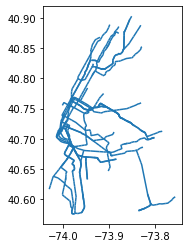

In [3]:
subwaylines.plot()

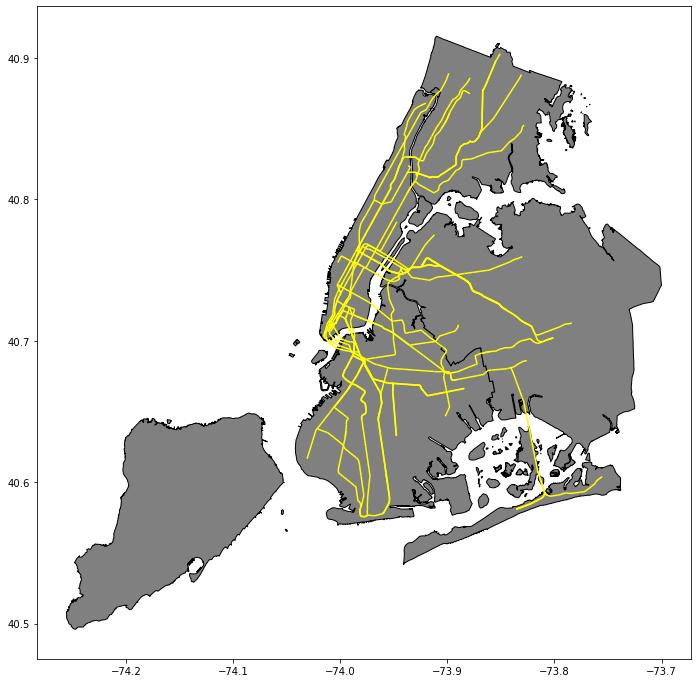

In [4]:
boundary = gpd.read_file(r'C:\Users\Nicole\Downloads\Borough Boundaries\geo_export_402abf60-ff4f-4bd7-a85b-460323a12e85.shp')

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(12, 12))
base = boundary.plot(ax=ax, color='grey', edgecolor='black')
subwaylines.plot(ax=ax, marker='o', color = 'yellow',markersize=30, legend=True);

In [5]:
subwaystations = gpd.read_file(r'C:\Users\Nicole\Downloads\Subway Stations.geojson')

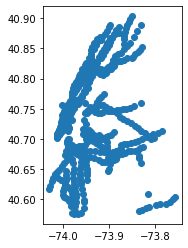

In [6]:
subwaystations.plot()

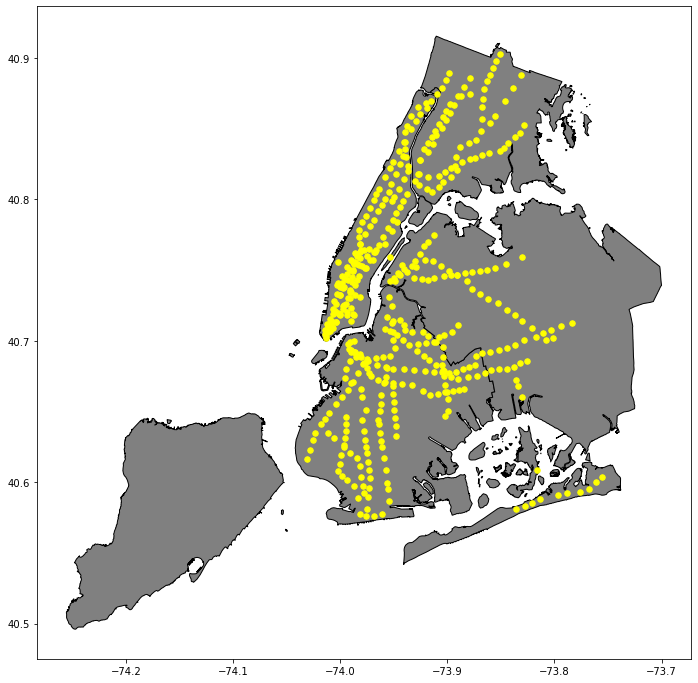

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(12, 12))
base = boundary.plot(ax=ax, color='grey', edgecolor='black')
subwaystations.plot(ax=ax, marker='o', color = 'yellow',markersize=30, legend=True);

In [36]:
#station list
Stations = pd.read_csv( 'https://raw.githubusercontent.com/CUSP2021ADS/Data/main/NYCSubwayNodes.csv' , index_col=None, header=0 )
Stations.head()

,name,id,boro,lat,long,lines
0,Greenpoint Av,G26,Bk,40.731352,-73.954449,G
1,21 St,G24,Q,40.744065,-73.949724,G
2,Court Sq,G22,Q,40.746554,-73.943832,G
3,36 St,G20,Q,40.752039,-73.928781,M R
4,Queens Plaza,G21,Q,40.748973,-73.937243,E M R


In [39]:
#connection list
Links = pd.read_csv( 'https://raw.githubusercontent.com/CUSP2021ADS/Data/main/NYCSubwayEdges.csv' , index_col=None, header=0 )
Links.head()

,origin,dest
0,G26,G24
1,G26,G28
2,G24,G26
3,G24,G22
4,G22,G24


In [40]:
#create a dictionary of subway stations by name and location
StPos={Stations.id[c]:(Stations.long[c],Stations.lat[c]) for c in Stations.index}
StName={Stations.id[c]:Stations.name[c] for c in Stations.index}

In [41]:
#creare a directed graph subway network
NYCSubway=nx.DiGraph()
for i in Links.index:
   NYCSubway.add_edge(Links.origin[i],Links.dest[i])  

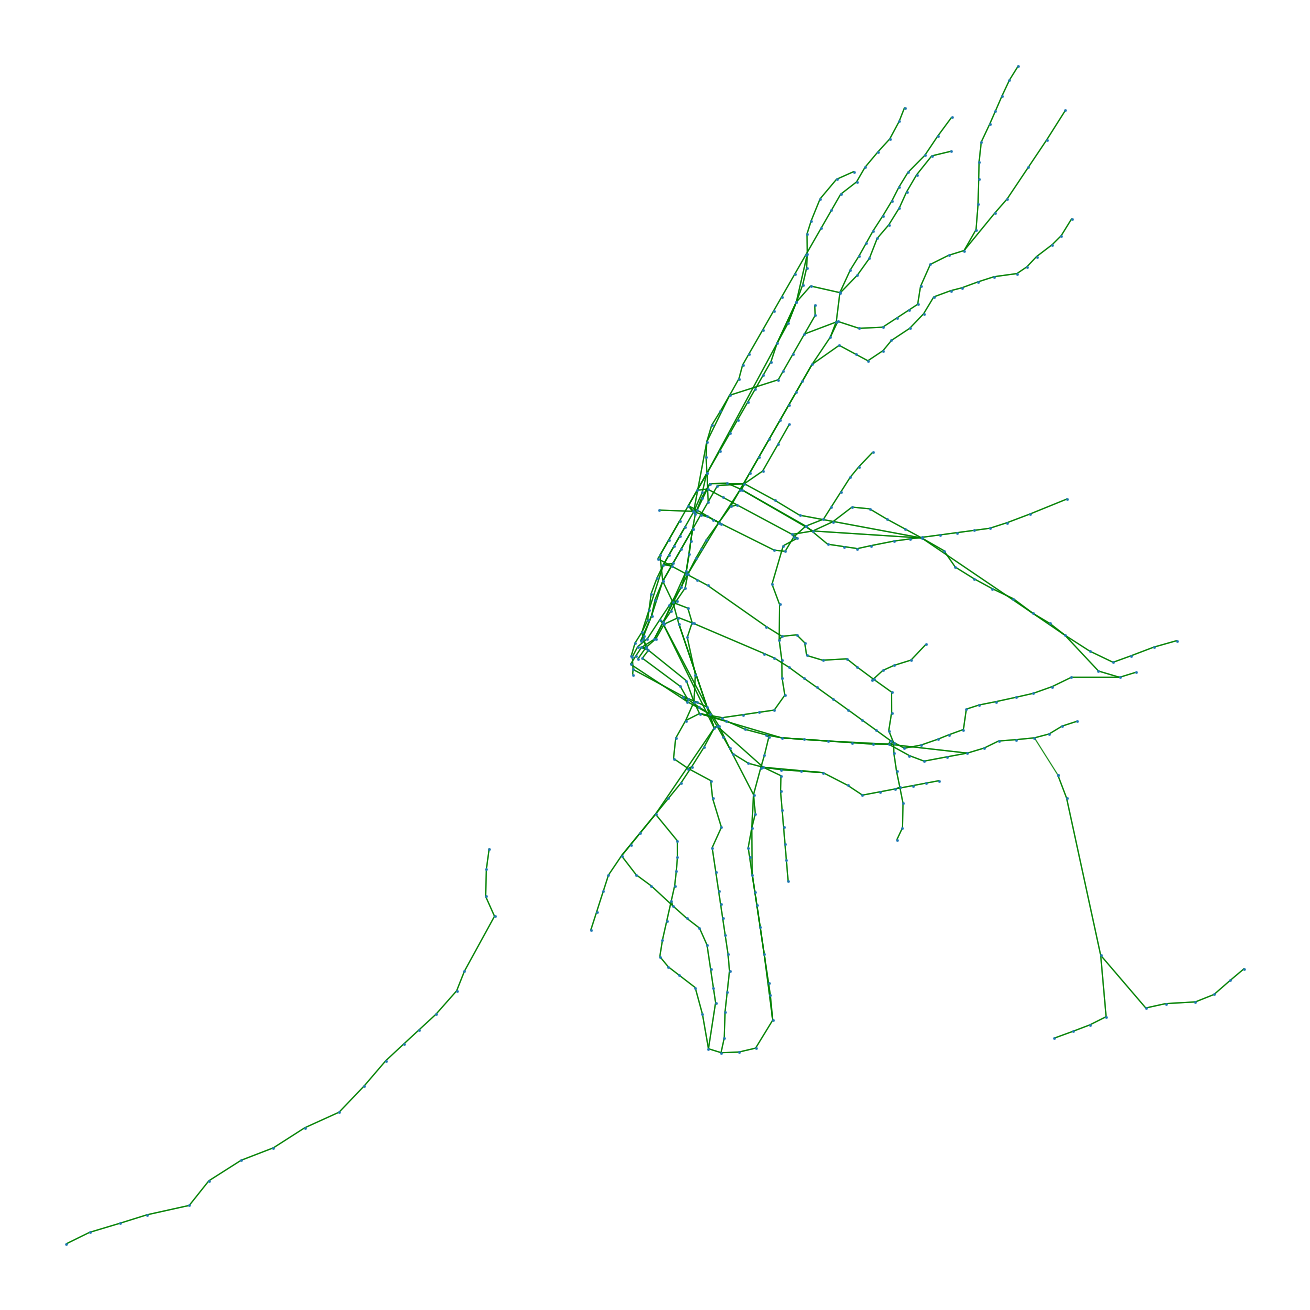

In [42]:
#visualize the subway newtork
plt.figure(figsize = (18,18))
nx.draw(NYCSubway,pos=StPos,with_labels=False,arrows=False,node_size=3,width=1,edge_color='green')

In [7]:
turnstile.head(5)

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,03:00:00,REGULAR,7511448,2558786
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,07:00:00,REGULAR,7511451,2558789
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,11:00:00,REGULAR,7511461,2558813
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,15:00:00,REGULAR,7511495,2558831
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,19:00:00,REGULAR,7511620,2558857


In [8]:
turnstile['Station'].unique()

array(['59 ST', '5 AV/59 ST', '57 ST-7 AV', '49 ST', 'TIMES SQ-42 ST',
       '34 ST-HERALD SQ', '28 ST', '23 ST', '14 ST-UNION SQ', '8 ST-NYU',
       'PRINCE ST', 'CANAL ST', 'CITY HALL', 'CORTLANDT ST', 'RECTOR ST',
       'WHITEHALL S-FRY', 'DELANCEY/ESSEX', 'BOWERY', 'CHAMBERS ST',
       'FULTON ST', 'BROAD ST', '7 AV', 'PARK PLACE', 'BOTANIC GARDEN',
       'PROSPECT PARK', 'PARKSIDE AV', 'CHURCH AV', 'BEVERLEY ROAD',
       'CORTELYOU RD', 'NEWKIRK PLAZA', 'AVENUE H', 'AVENUE J',
       'AVENUE M', 'KINGS HWY', 'AVENUE U', 'NECK RD', 'SHEEPSHEAD BAY',
       'BRIGHTON BEACH', 'OCEAN PKWY', 'BOROUGH HALL', 'JAY ST-METROTEC',
       'DEKALB AV', 'ATL AV-BARCLAY', 'UNION ST', '4AV-9 ST',
       'PROSPECT AV', '25 ST', '36 ST', '45 ST', '53 ST', 'BAY RIDGE AV',
       '77 ST', '86 ST', 'BAY RIDGE-95 ST', '8 AV', 'FT HAMILTON PKY',
       'NEW UTRECHT AV', '18 AV', '20 AV', 'BAY PKWY', '9 AV', '50 ST',
       '55 ST', '71 ST', '79 ST', '25 AV', 'BAY 50 ST', 'CONEY IS-STILLW',
      

In [9]:
transit = pd.read_csv(r'C:\Users\Nicole\Downloads\NYC_Transit_Subway_Entrance_And_Exit_Data.csv')

In [10]:
transit.head()

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,...,ADA,ADA Notes,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,...,False,NaN,False,4th Ave,25th St,SW,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.99822)"
1,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,...,False,NaN,False,4th Ave,25th St,SE,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)"
2,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NW,40.654676,-74.004306,"(40.655144, -74.003549)","(40.654676, -74.004306)"
3,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NE,40.654365,-74.004113,"(40.655144, -74.003549)","(40.654365, -74.004113)"
4,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NW,40.654490,-74.004499,"(40.655144, -74.003549)","(40.65449, -74.004499)"


In [11]:
transit['Station Name'].unique()

array(['25th St', '36th St', '45th St', '53rd St', '59th St', '77th St',
       '86th St', '95th St', '9th St', 'Atlantic Av-Barclays Ctr',
       'Bay Ridge Av', 'DeKalb Av', 'Pacific St', 'Prospect Av',
       'Union St', '30 Av-Grand Av', '36 Av-Washington Av',
       '39 Av-Beebe Av', 'Astoria Blvd-Hoyt Av', 'Broadway',
       'Ditmars Blvd', '7th Av', 'Atlantic Av', 'Av H', 'Av J', 'Av M',
       'Av U', 'Beverly Rd', 'Brighton Beach', 'Church Av',
       'Cortelyou Rd', 'Kings Highway', 'Neck Rd', 'Newkirk Av',
       'Ocean Parkway', 'Parkside Av', 'Prospect Park', 'Sheepshead Bay',
       'Stillwell Av', 'West 8th St', '23rd St', '28th St', '34th St',
       '49th St', '57th St', '5th Av', '8th St', 'Canal St (UL)',
       'City Hall', 'Cortlandt St', 'Court St', 'Lawrence St',
       'Lexington Av', 'Prince St', 'Rector St', 'Times Square-42nd St',
       'Union Square', 'Whitehall St', '104th St-102nd St', '111th St',
       '121st St', 'Alabama Av', 'Chauncey St', 'Cleveland

In [12]:
transit

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,...,ADA,ADA Notes,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,...,False,NaN,False,4th Ave,25th St,SW,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.99822)"
1,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,...,False,NaN,False,4th Ave,25th St,SE,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)"
2,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NW,40.654676,-74.004306,"(40.655144, -74.003549)","(40.654676, -74.004306)"
3,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NE,40.654365,-74.004113,"(40.655144, -74.003549)","(40.654365, -74.004113)"
4,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NW,40.654490,-74.004499,"(40.655144, -74.003549)","(40.65449, -74.004499)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,IRT,White Plains Road,Simpson St,40.824073,-73.893064,2,5,NaN,NaN,NaN,...,True,NaN,False,Westchester Ave,Simpson St,SW,40.823884,-73.893197,"(40.824073, -73.893064)","(40.823884, -73.893197)"
1864,IRT,White Plains Road,Simpson St,40.824073,-73.893064,2,5,NaN,NaN,NaN,...,True,NaN,False,Westchester Ave,Simpson St,SE,40.824118,-73.892731,"(40.824073, -73.893064)","(40.824118, -73.892731)"
1865,IRT,White Plains Road,Wakefield-241st St,40.903125,-73.850620,2,5,NaN,NaN,NaN,...,False,NaN,True,White Plains Rd,241st St,SE,40.903283,-73.850321,"(40.903125, -73.85062)","(40.903283, -73.850321)"
1866,IRT,White Plains Road,Wakefield-241st St,40.903125,-73.850620,2,5,NaN,NaN,NaN,...,False,NaN,True,White Plains Rd,241st St,NW,40.903597,-73.850360,"(40.903125, -73.85062)","(40.903597, -73.85036)"


In [43]:
#station list
Stations = pd.read_csv( 'https://raw.githubusercontent.com/CUSP2021ADS/Data/main/NYCSubwayNodes.csv' , index_col=None, header=0 )
Stations.head()

,name,id,boro,lat,long,lines
0,Greenpoint Av,G26,Bk,40.731352,-73.954449,G
1,21 St,G24,Q,40.744065,-73.949724,G
2,Court Sq,G22,Q,40.746554,-73.943832,G
3,36 St,G20,Q,40.752039,-73.928781,M R
4,Queens Plaza,G21,Q,40.748973,-73.937243,E M R


In [44]:
#connection list
Links = pd.read_csv( 'https://raw.githubusercontent.com/CUSP2021ADS/Data/main/NYCSubwayEdges.csv' , index_col=None, header=0 )
Links.head()

,origin,dest
0,G26,G24
1,G26,G28
2,G24,G26
3,G24,G22
4,G22,G24


In [45]:
#create a dictionary of subway stations by name and location
StPos={Stations.id[c]:(Stations.long[c],Stations.lat[c]) for c in Stations.index}
StName={Stations.id[c]:Stations.name[c] for c in Stations.index}

In [46]:
#add necessary libraries
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [47]:
#creare a directed graph subway network
NYCSubway=nx.DiGraph()
for i in Links.index:
   NYCSubway.add_edge(Links.origin[i],Links.dest[i])   

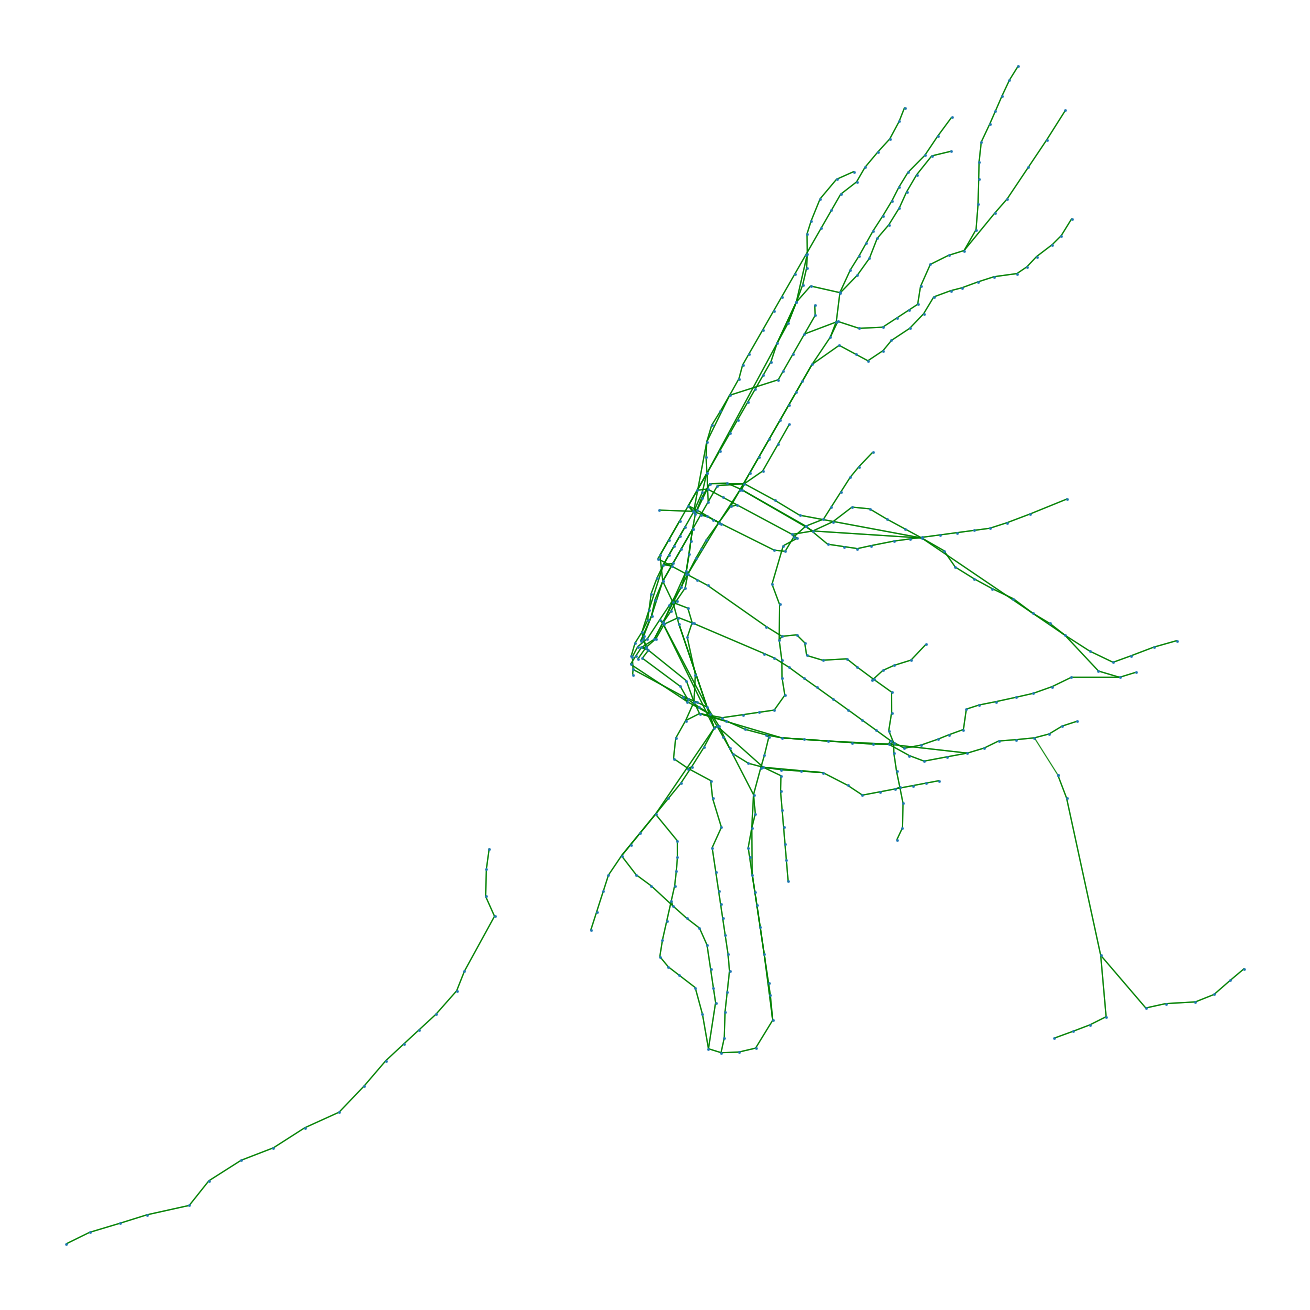

In [48]:
#visualize the subway newtork
plt.figure(figsize = (18,18))
nx.draw(NYCSubway,pos=StPos,with_labels=False,arrows=False,node_size=3,width=1,edge_color='green')

# find the shortest path between 125 St(621) - TO 103 St (624)

In [54]:
#find the shortest path between 125 St(621) - TO 103 St (624)

path1=nx.shortest_path(NYCSubway,'621','624')

In [55]:
path1

['621', '622', '623', '624']

In [56]:
len(path1)

4

In [57]:
#auxiliary function - visualize path on the map
def visualize_path(path):
    plt.figure(figsize = (15,18))
    nx.draw(NYCSubway,pos=StPos,with_labels=False,arrows=False,node_size=1,width=1,edge_color='green')
    x=[StPos[v][0] for v in path]
    y=[StPos[v][1] for v in path]
    plt.plot(x,y,'ro-')
    plt.plot([x[0],x[-1]],[y[0],y[-1]],'bs',markersize=10)

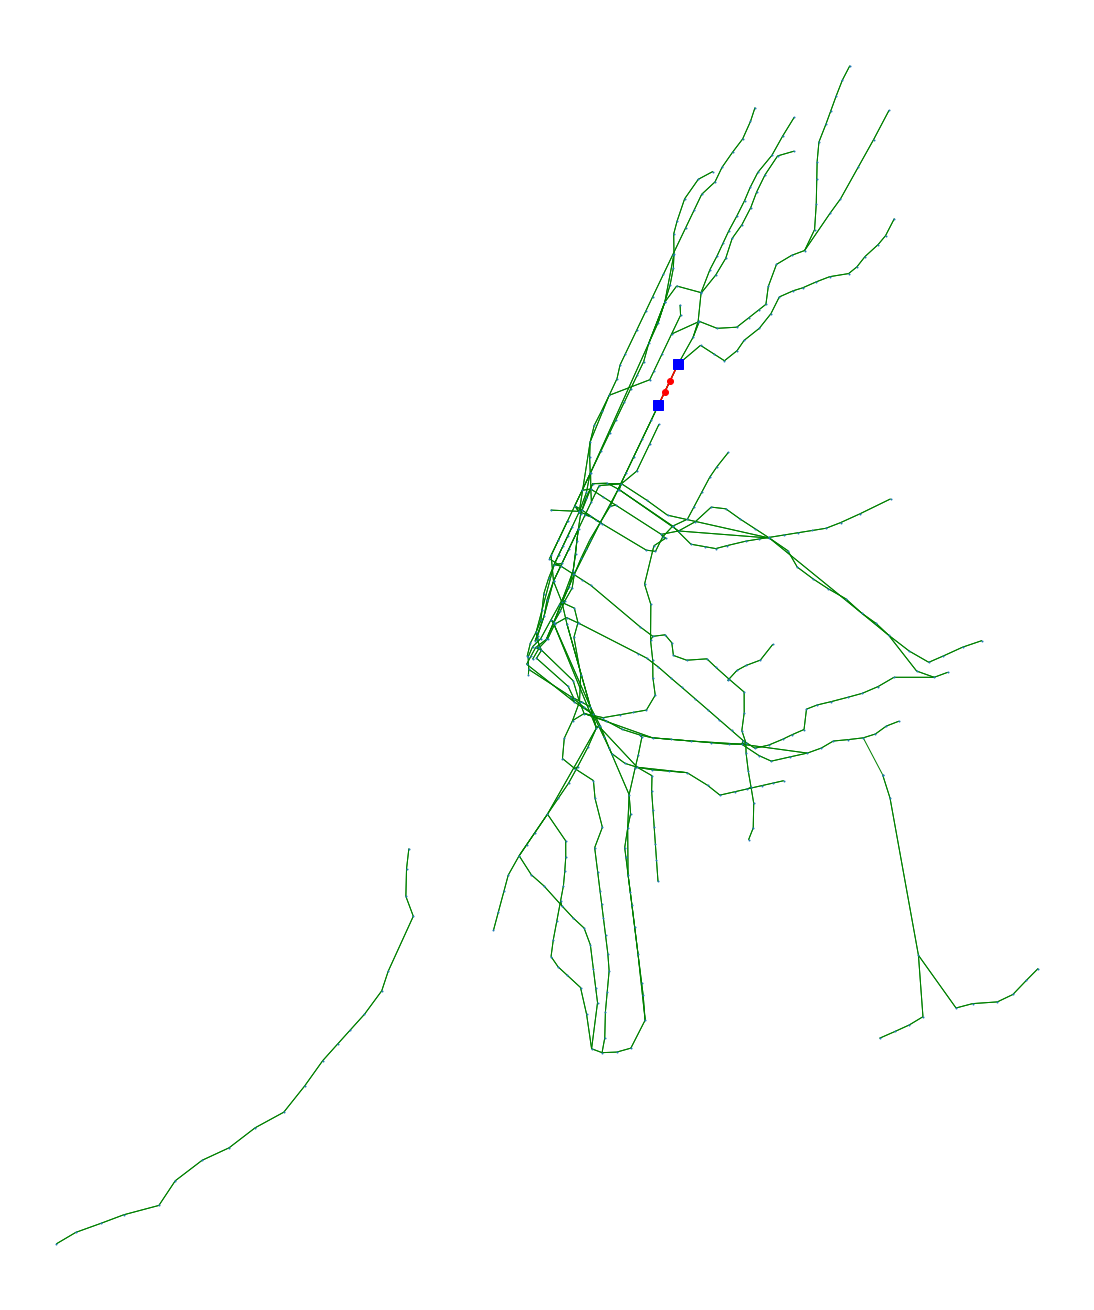

In [58]:
visualize_path(path1)

# 86 St (Q04) to 125 St (116)

In [69]:
path2=nx.shortest_path(NYCSubway,'Q04','116',weight='dist') #shorest path according to dist

In [70]:
path2

['Q04',
 'Q03',
 'B08',
 'R14',
 'R16',
 '127',
 '123',
 '120',
 '119',
 '118',
 '117',
 '116']

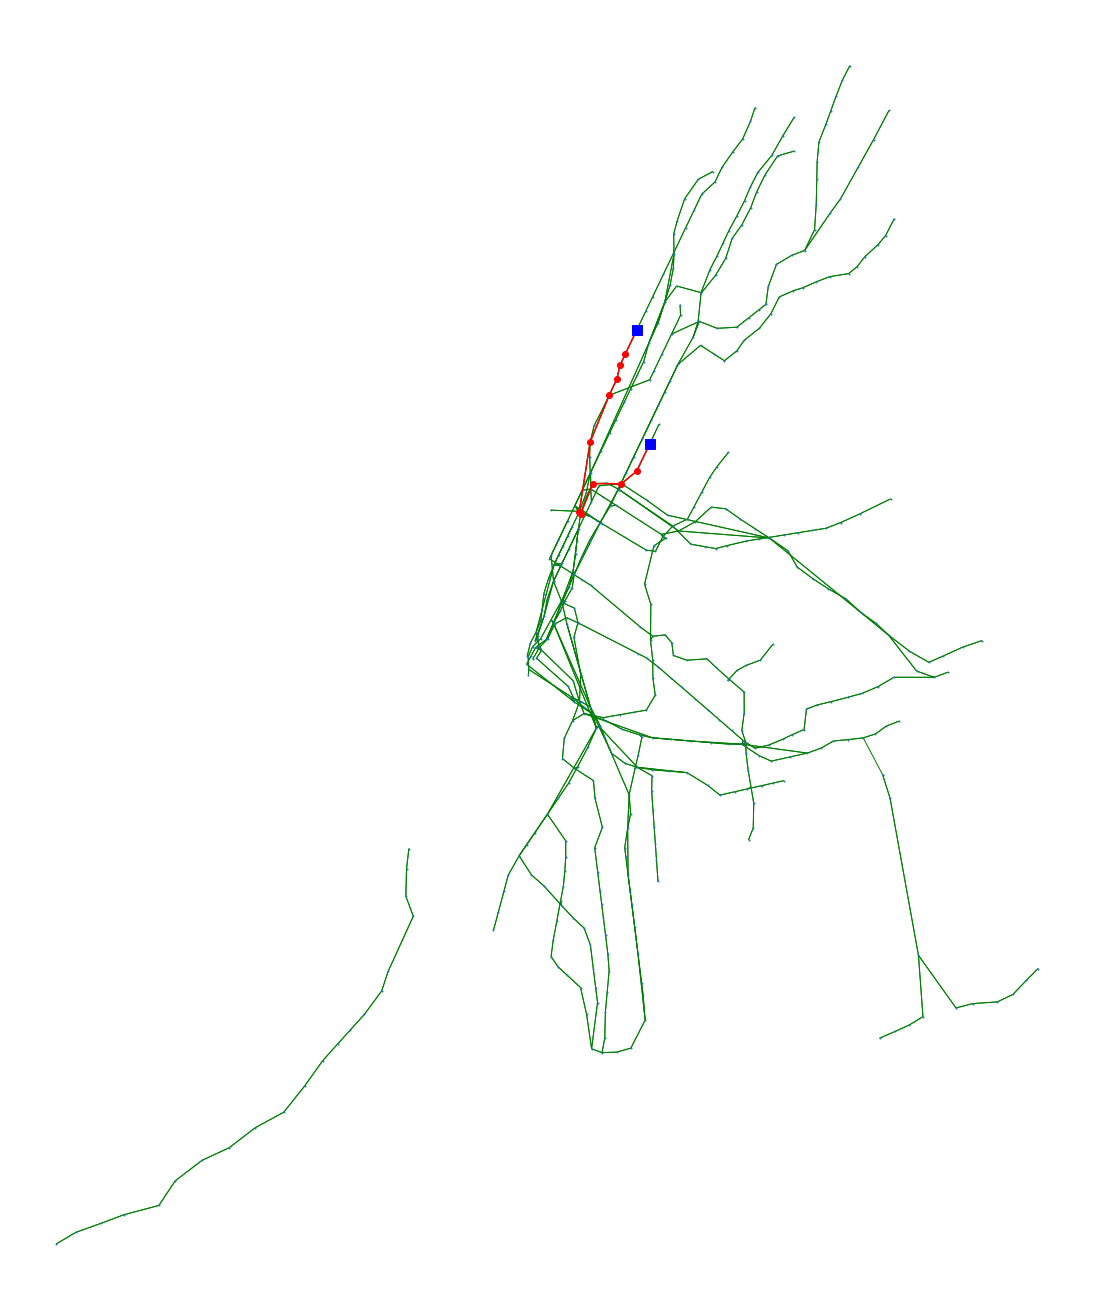

In [71]:
visualize_path(path2)

# 23St(A30) to 125St (116)

In [72]:
#find the shortest path between Herald SQ (R17) and 125 St(225)

path3=nx.shortest_path(NYCSubway,'A30','116')

In [73]:
path3

['A30', 'A28', 'A27', '127', '123', '120', '119', '118', '117', '116']

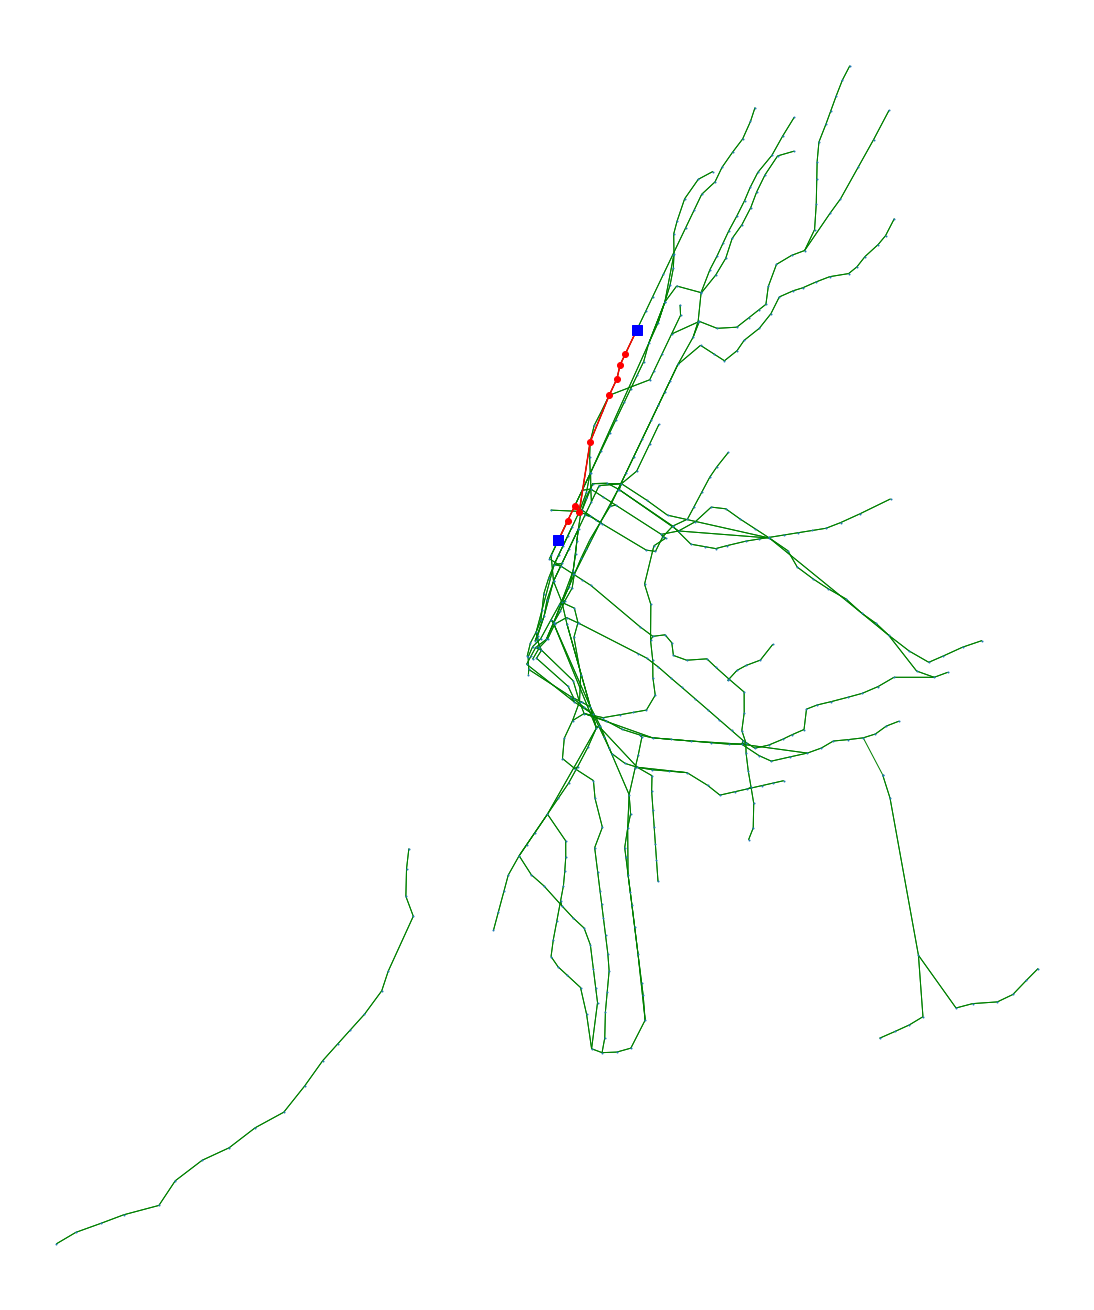

In [74]:
visualize_path(path3)

Herald SQ-Times Sq - 42 St, then to 72 St, then to 96 St,and then to Central Park North (110 St), and then to 116 St and then to 125st

### Herald SQ to 34 St Penn State

In [ ]:
#find the shortest path between Herald SQ (R17) and 34 St Penn(128)

path4=nx.shortest_path(NYCSubway,'R17','128')

In [ ]:
path4

In [ ]:
visualize_path(path4)

### 34St Penn (128)to Fluton (418)

In [ ]:
#find the shortest path between Herald SQ (R17) and 34 St Penn(128)

path5=nx.shortest_path(NYCSubway,'128','418')

In [ ]:
path5

In [ ]:
visualize_path(path5)

### gravity model

In [18]:
# population and jobs per zip code 

popJobs = pd.read_csv('https://raw.githubusercontent.com/CUSP2021ADS/Data/main/popJobs.csv')
popJobs.head()

,ZIPCODE,totalJobs,POPULATION
0,10001,208913,22413.0
1,10002,26789,81305.0
2,10003,98019,55878.0
3,10004,79535,2187.0
4,10005,51207,8107.0


Mathematically, the gravity model can be formulated as:

𝑀𝑖,𝑗=𝑇𝑖𝑇𝑗𝑓(𝐶𝑖,𝑗)
 
where  𝑀𝑖,𝑗  is the interaction between locations  𝑖  to  𝑗 ,  𝑇𝑖,𝑇𝑗  are the measures of 'attraction' associated with origin-destination pairs and  𝑓(𝐶𝑖,𝑗)  is a function of travel time (or distance, cost)  𝐶𝑖,𝑗  between the locations in question.

For modeling commute flows, the attraction factors can be taken to be socio-economic variables like working population, jobs, etc., which can be subject to fit by introducing parameters in their formulation. For simplicity, we'll keep the attraction terms  𝑇  constant as the residential population of the concerned locations. Furthermore, we'll take the function of travel time  𝑓(𝐶𝑖,𝑗)  to be a power law function with a single parameter  𝑞 .

Hence, our gravity model can be formulated as:
𝑀𝑖,𝑗=𝑃𝑖𝑃𝑗𝐶𝑖,𝑗𝑞
 
where  𝑃  is fixed to be the population.

Taking log, the equation transforms to
𝑙𝑜𝑔(𝑀𝑖,𝑗)=𝑙𝑜𝑔(𝑘)+𝑙𝑜𝑔(𝑃𝑖)+𝑙𝑜𝑔(𝑃𝑗)+𝑞∗𝑙𝑜𝑔(𝐶𝑖,𝑗)
 
with  𝑙𝑜𝑔(𝑘)  being the intercept. We can estimate the parameter  𝑞  by fitting a linear model to the data

In [19]:
## travel time in minutes between o-d pairs

travelTim = pd.read_csv('https://raw.githubusercontent.com/CUSP2021ADS/Data/main/AllZipsTimes_new.csv', index_col=None)
travelTim = travelTim[travelTim.time_minutes < 200]
travelTim.loc[(travelTim.O == travelTim.D), 'time_minutes'] = 10  ## assign travel time b/w same zones as 10min
travelTim.head()

,O,D,time_minutes
0,10473,10001,68.0
1,10473,10002,73.0
2,10473,10003,72.0
3,10473,10004,72.0
4,10473,10005,74.0


In [20]:
# ground-truth LEHD commute matrix ('total' referes to the commute numbers)

Z2Z = pd.read_csv('https://raw.githubusercontent.com/CUSP2021ADS/Data/main/zip2zip.csv', index_col=None)
Z2Z = Z2Z[['w_zip', 'h_zip', 'total']]
Z2Z.head()

,w_zip,h_zip,total
0,10001,10001,1223
1,10001,10002,1547
2,10001,10003,1623
3,10001,10004,180
4,10001,10005,236


In [21]:
# merge all data together

allData = Z2Z.merge(travelTim, left_on=['h_zip', 'w_zip'], right_on=['O', 'D'])
allData = allData.merge(popJobs, left_on='O', right_on='ZIPCODE')
allData = allData.merge(popJobs, left_on='D', right_on='ZIPCODE')
allData.rename(columns={'POPULATION_x':'O_population', 'POPULATION_y':'D_population'}, inplace=True)
allData = allData[['O', 'D', 'total', 'time_minutes', 'O_population', 'D_population']]
allData.loc[(allData['O_population'] == 0), 'O_population'] = 1 
allData.loc[(allData['D_population'] == 0), 'D_population'] = 1 
allData.loc[(allData['total'] == 0), 'total'] = 0.001 

allData.head()

,O,D,total,time_minutes,O_population,D_population
0,10001,10001,1223.0,10.0,22413.0,22413.0
1,10002,10001,1547.0,24.0,81305.0,22413.0
2,10003,10001,1623.0,24.0,55878.0,22413.0
3,10004,10001,180.0,27.0,2187.0,22413.0
4,10005,10001,236.0,23.0,8107.0,22413.0


In [22]:
# model function

def gravity(T_i, T_j, T_j2,C_ij, mob_gt):
    
    X = sm.add_constant(np.log(C_ij))
    y = np.log(mob_gt) - np.log(T_i) - np.log(T_j)-np.log(T_j2)
    
    model = sm.OLS(y, X).fit()
    
    return model

In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import scipy.stats as stats
import networkx as nx  # for network analysis
import pycombo  # for community detection 
import geopandas as gpd
import shapely

In [26]:
# add jobs to data

allDataJobs = allData.merge(popJobs[['ZIPCODE', 'totalJobs']], left_on='D', right_on='ZIPCODE').drop(columns={'ZIPCODE'})
allDataJobs.rename(columns={'totalJobs':'D_jobs'}, inplace=True)
allDataJobs.head()

,O,D,total,time_minutes,O_population,D_population,D_jobs
0,10001,10001,1223.0,10.0,22413.0,22413.0,208913
1,10002,10001,1547.0,24.0,81305.0,22413.0,208913
2,10003,10001,1623.0,24.0,55878.0,22413.0,208913
3,10004,10001,180.0,27.0,2187.0,22413.0,208913
4,10005,10001,236.0,23.0,8107.0,22413.0,208913


In [27]:
model_pop_pop = gravity(allData.O_population, allData.D_population,allDataJobs.D_jobs,allData.time_minutes, allData.total)
model_pop_pop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     4851.
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:28:00   Log-Likelihood:                -89688.
No. Observations:               33742   AIC:                         1.794e+05
Df Residuals:                   33740   BIC:                         1.794e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -15.9478      0.143   -111.515      0.000     -16.228     -15.668
time_minutes    -2.4389      0.035    -69.648      0.000      -2.508      -2.370
==============================================================================
Omnibus:                    10579.505   Durbin-Watson:                   0.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25536.085
Skew:                           1.792   Prob(JB):                         0.00
Kurtosis:                       5.305   Cond. No.                         32.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:

model_pop_pop.params[1]

-2.438876101848529

In [28]:
# ground truth data

x = allDataJobs[['O', 'D', 'total']]
G = nx.from_pandas_edgelist(x, 'O', 'D', 'total')  # create graph with zip codes as nodes and flows as edge weights

In [29]:
resGt = pycombo.execute(G, weight='total')  # run combo algorithm and get communities

In [30]:
# function for visualizing communities

def visualizePartitionShape(gdf, Y, idfield, offset=0, plttitle = 'partition'): #take geopandas dataframe gdf with zip code shapefiles and the dictionary mapping zip codes to clusters
    #visualize shapes using communities for picking colors
    colors=['green','blue','red','yellow','magenta', 'orange', 'purple', 'gray', 'cyan']
    f, ax = plt.subplots(1, figsize=(12, 12))
    for c in range(max(Y.values())+1): #for each cluster
        if idfield=='index':
            ID=gdf.index
        else:
            ID=gdf[idfield]
        gdf.loc[(ID+offset).map(Y)==c].plot(axes=ax, color=colors[c]) #visualize zip codes which belong to it using cluster color
    plt.title(plttitle)
    plt.show()

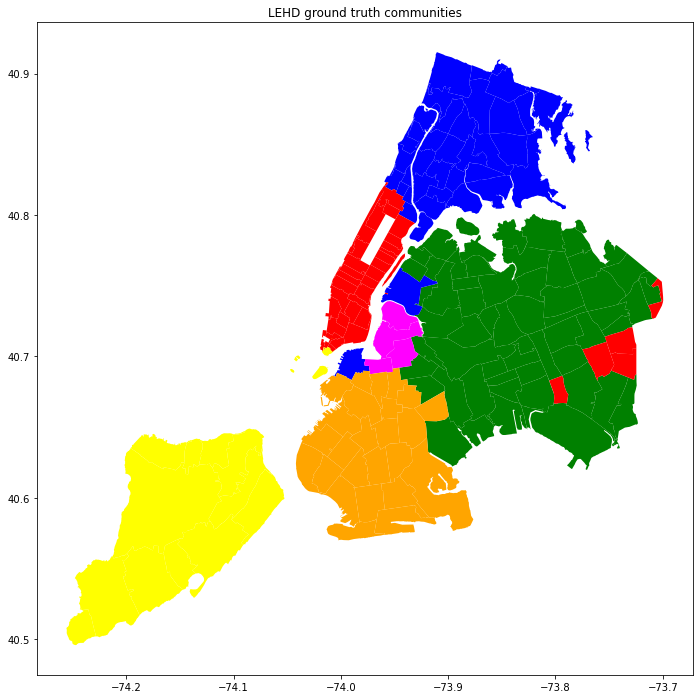

In [31]:
NYCzip = gpd.read_file("https://raw.githubusercontent.com/CUSP2020PUI/Data/master/NY.geojson") # zip shapefile
if True: #visualize partitions
    visualizePartitionShape(NYCzip, resGt[0], 'zipcode', plttitle = 'LEHD ground truth communities')

In [32]:
## mobility predictions 

allDataJobs['pred_pop_pop_jobs'] = np.exp(np.log(allDataJobs['O_population']) + np.log(allDataJobs['D_population']) +np.log(allDataJobs['D_jobs'])+ model_pop_pop.predict(sm.add_constant(np.log(allData['time_minutes']))))
allDataJobs.head()

,O,D,total,time_minutes,O_population,D_population,D_jobs,pred_pop_pop_jobs
0,10001,10001,1223.0,10.0,22413.0,22413.0,208913,45292.644217
1,10002,10001,1547.0,24.0,81305.0,22413.0,208913,19424.812159
2,10003,10001,1623.0,24.0,55878.0,22413.0,208913,13349.974218
3,10004,10001,180.0,27.0,2187.0,22413.0,208913,392.042989
4,10005,10001,236.0,23.0,8107.0,22413.0,208913,2148.713355


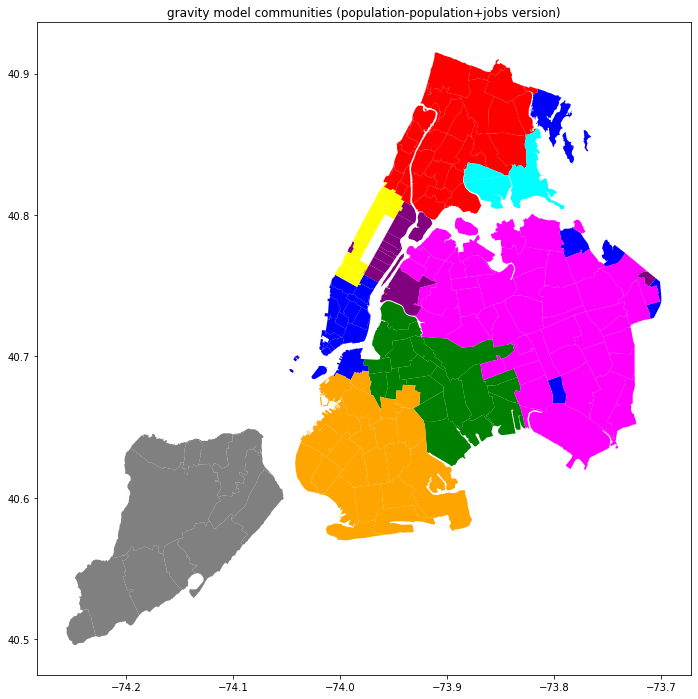

In [34]:
# gravity model results

y = allDataJobs[['O', 'D', 'pred_pop_pop_jobs']]
G = nx.from_pandas_edgelist(y, 'O', 'D', 'pred_pop_pop_jobs')

resPred = pycombo.execute(G, weight='pred_pop_pop_jobs')

NYCzip = gpd.read_file("https://raw.githubusercontent.com/CUSP2020PUI/Data/master/NY.geojson")
if True: #visualize partitions
    visualizePartitionShape(NYCzip, resPred[0], 'zipcode', plttitle = 'gravity model communities (population-population+jobs version)')

In [2]:
import pandas as pd
import geopandas as gpd

import numpy as np
import matplotlib.pyplot as plt #for creating plots
from scipy import stats
import seaborn as sns #for styling the plots
#warnings.filterwarnings('ignore')
%matplotlib inline 
uscensus=gpd.read_file(r'C:\Users\Nicole\Downloads\2010 Census Tracts\geo_export_604d3327-1f06-45be-8582-a46496d212b1.shp')

In [3]:
uscensus

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry
0,5,5000900,Staten Island,E,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,"POLYGON ((-74.07921 40.64343, -74.07914 40.643..."
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.200306,"POLYGON ((-73.96433 40.75638, -73.96479 40.755..."
2,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,"POLYGON ((-73.97124 40.76094, -73.97170 40.760..."
3,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,"POLYGON ((-73.97446 40.76229, -73.97491 40.761..."
4,1,1011300,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860712,"POLYGON ((-73.98412 40.75484, -73.98460 40.754..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2160,1,1014802,Manhattan,I,014802,148.02,MN40,Upper East Side-Carnegie Hill,3805,1.351073e+06,4691.030751,"POLYGON ((-73.95166 40.78201, -73.95212 40.781..."
2161,3,3006700,Brooklyn,I,006700,67,BK33,Carroll Gardens-Columbia Street-Red Hook,4005,1.680804e+06,5236.047697,"POLYGON ((-73.99441 40.68545, -73.99458 40.685..."
2162,3,3007500,Brooklyn,I,007500,75,BK33,Carroll Gardens-Columbia Street-Red Hook,4005,3.052947e+06,7513.484999,"POLYGON ((-73.99042 40.68269, -73.98827 40.681..."
2163,3,3005300,Brooklyn,I,005300,53,BK33,Carroll Gardens-Columbia Street-Red Hook,4005,1.769699e+07,55178.828324,"POLYGON ((-74.00485 40.68567, -74.00518 40.685..."


In [4]:
POI=gpd.read_file(r'C:\Users\Nicole\Downloads\Points Of Interest.geojson')

In [5]:
POI

,name,source,complexid,saftype,pri_add,modified,faci_dom,facility_t,b7_sc,placeid,bin,sos,segmentid,borough,created,geometry
0,HRD RAMP TO GWB OVER HRD SB,DCP,401,N,0,2020-03-12T00:00:00+00:00,8,6,11095502,1031153,0,1,193927,1,2018-04-12T00:00:00+00:00,POINT (-73.93149 40.84419)
1,GOETHALS,DCP,0,N,0,2020-03-16T00:00:00+00:00,8,6,59703501,19954,0,1,321726,5,2008-03-15T00:00:00+00:00,POINT (-74.19673 40.63526)
2,KOCH BR PEDESTRIAN AND BIKE PATH,DoITT,0,N,0,2020-03-16T00:00:00+00:00,8,6,19792015,1026908,0,1,138896,1,2015-10-20T00:00:00+00:00,POINT (-73.95802 40.75849)
3,KOCH BR PEDESTRIAN AND BIKE,DoITT,0,N,0,2020-03-16T00:00:00+00:00,8,6,49734017,1026909,0,1,139388,4,2015-10-20T00:00:00+00:00,POINT (-73.95062 40.75530)
4,14 AV OV BELT CROSS ISL PKWY,DCP,0,N,0,2018-04-19T00:00:00+00:00,8,6,40074101,1031297,0,2,179357,4,2018-04-13T00:00:00+00:00,POINT (-73.81678 40.78815)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20464,LEHMAN COLLEGE BOOKSTORE,DoITT,398,X,0,2021-03-12T00:00:00+00:00,7,2,24580003,13682,2097311,2,80092,2,2009-05-14T00:00:00+00:00,POINT (-73.89594 40.87190)
20465,MIDTOWN SOUTH PRECINCT 14 PRECINCT,NYPD,0,N,1016900,2021-03-12T00:00:00+00:00,1,11,10007001,14333,1013564,2,327558,1,2009-05-14T00:00:00+00:00,POINT (-73.99499 40.75388)
20466,NAUTILUS PLAYGROUND,DoITT,0,G,0,2021-03-12T00:00:00+00:00,9,4,31351501,118,0,2,9000540,3,2009-05-14T00:00:00+00:00,POINT (-73.99569 40.57168)
20467,ST LUKE SCHOOL,EMS,0,None,119154,2021-03-12T00:00:00+00:00,4,2,None,11320,4106709,1,327515,4,2009-05-14T00:00:00+00:00,POINT (-73.81018 40.78437)


In [12]:
neighbor = gpd.read_file(r'C:\Users\Nicole\Downloads\neighbourhoods.geojson')
neighbor

,neighbourhood,neighbourhood_group,geometry
0,Bayswater,Queens,"MULTIPOLYGON (((-73.76671 40.61491, -73.76825 ..."
1,Allerton,Bronx,"MULTIPOLYGON (((-73.84860 40.87167, -73.84582 ..."
2,City Island,Bronx,"MULTIPOLYGON (((-73.78282 40.84392, -73.78257 ..."
3,Ditmars Steinway,Queens,"MULTIPOLYGON (((-73.90160 40.76777, -73.90391 ..."
4,Ozone Park,Queens,"MULTIPOLYGON (((-73.83754 40.69136, -73.83108 ..."
...,...,...,...
228,Westchester Square,Bronx,"MULTIPOLYGON (((-73.84294 40.84640, -73.83913 ..."
229,Westerleigh,Staten Island,"MULTIPOLYGON (((-74.13131 40.62633, -74.13192 ..."
230,Williamsbridge,Bronx,"MULTIPOLYGON (((-73.86722 40.86969, -73.86701 ..."
231,Williamsburg,Brooklyn,"MULTIPOLYGON (((-73.95757 40.72510, -73.95300 ..."


In [7]:

zoning = gpd.read_file(r'C:\Users\Nicole\Downloads\Zoning GIS Data_ Shapefile\geo_export_1a46461b-c3ab-4c87-9956-86fd04967650.shp')

zoning

,shape_area,shape_leng,zonedist,geometry
0,3.722454e+05,2575.578630,R4-1,"POLYGON ((-74.00753 40.62772, -74.00870 40.626..."
1,1.606990e+04,569.651123,PARK,"POLYGON ((-73.95603 40.70929, -73.95635 40.708..."
2,2.017800e+04,719.458367,PARK,"POLYGON ((-73.98604 40.66008, -73.98627 40.659..."
3,2.055248e+05,2499.135233,M1-1,"POLYGON ((-73.99187 40.67695, -73.99188 40.676..."
4,7.561834e+04,1147.584820,C4-4D,"POLYGON ((-73.89553 40.67275, -73.89550 40.672..."
...,...,...,...,...
5264,3.034059e+07,54262.830225,R4,"POLYGON ((-73.89951 40.77493, -73.89522 40.771..."
5265,1.083422e+06,6718.679010,M1-1,"POLYGON ((-73.96865 40.68200, -73.96755 40.681..."
5266,9.467774e+03,478.742009,C6-2A,"POLYGON ((-73.96669 40.68113, -73.96687 40.681..."
5267,3.787089e+04,778.647956,C6-3X,"POLYGON ((-73.96686 40.68119, -73.96687 40.681..."


In [8]:

zoning2 = gpd.read_file(r'C:\Users\Nicole\Downloads\Zoning GIS Data_ Shapefile\geo_export_2fa36ade-fc12-4cdf-8c89-9fbfcb0e6474.shp')

zoning2

,date_effec,time_effec,lucats,project_na,shape_area,shape_leng,status,ulurpno,geometry
0,2009-10-14,00:00:00.000,060551,BRIARWOOD PLAZA,2.967988e+04,735.793336,Adopted,060551zmq,"POLYGON ((-73.77294 40.76734, -73.77207 40.767..."
1,2009-10-28,00:00:00.000,060419,SOUTH CONDUIT REZONING,3.803487e+04,820.472092,Adopted,060419zmq,"POLYGON ((-73.74817 40.66549, -73.74751 40.665..."
2,2011-03-23,00:00:00.000,070245,WYTHE AVE REZONING,8.037651e+04,1138.820270,Adopted,070245zmk,"POLYGON ((-73.96603 40.71453, -73.96514 40.714..."
3,2010-07-29,00:00:00.000,050522,94TH ST-CORONA AVE,6.151183e+05,3467.453317,Adopted,050522zmq,"POLYGON ((-73.87451 40.74331, -73.87137 40.744..."
4,2007-11-15,00:00:00.000,000198,E60TH ST REZONING,9.776791e+04,1461.609225,Adopted,000198zmm,"POLYGON ((-73.96029 40.76054, -73.95881 40.759..."
...,...,...,...,...,...,...,...,...,...
1226,None,None,210462,Brooklyn Navy Yard,1.183575e+07,15595.730988,Certified,210462zmk,"POLYGON ((-73.98082 40.70137, -73.98058 40.701..."
1227,None,None,210276,1045 Atlantic Avenue,6.084948e+04,1037.230119,Certified,210276zmk,"POLYGON ((-73.95737 40.67964, -73.95719 40.680..."
1228,None,None,220062,Ring River,5.084786e+05,3200.644795,Certified,220062zmk,"POLYGON ((-73.96651 40.71956, -73.96413 40.718..."
1229,None,None,210239,2134 COYLE STREET REZONING,6.803475e+04,1270.487503,Certified,210239zmk,"POLYGON ((-73.93708 40.60057, -73.93683 40.599..."


In [9]:

zoning3 = gpd.read_file(r'C:\Users\Nicole\Downloads\Zoning GIS Data_ Shapefile\geo_export_08bbc04f-b877-4063-9da9-16613ebbb270.shp')

zoning3

,sdlbl,sdname,shape_area,shape_leng,geometry
0,125th,Special 125th Street District,2.917483e+06,13303.326133,"POLYGON ((-73.95424 40.81192, -73.95422 40.811..."
1,BPC,Special Battery Park City District,4.224874e+06,11731.569707,"POLYGON ((-74.01670 40.71879, -74.01323 40.718..."
2,CD,Special City Island District,1.190719e+07,36476.100018,"POLYGON ((-73.79190 40.85549, -73.79194 40.855..."
3,CI,Special Coney Island District,3.855116e+06,9852.433955,"POLYGON ((-73.97794 40.57570, -73.97756 40.575..."
4,CO,Special Coney Island Mixed Use District,9.810344e+05,4865.808054,"POLYGON ((-73.98264 40.58206, -73.98235 40.582..."
...,...,...,...,...,...
150,MX-19,Special Mixed Use District (MX-19),1.128199e+05,1388.657664,"POLYGON ((-73.90841 40.66065, -73.90749 40.660..."
151,MX-21,Special Mixed Use District (MX-21),5.931704e+04,1089.745037,"POLYGON ((-73.76743 40.59215, -73.76764 40.593..."
152,CR-4,Special Coastal Risk District 4,7.758184e+06,13450.615498,"POLYGON ((-73.93020 40.59668, -73.92487 40.591..."
153,MX-22,Special Mixed Use District (MX-22),2.262069e+04,608.522102,"POLYGON ((-73.92177 40.70470, -73.92215 40.704..."


In [10]:

zoning4 = gpd.read_file(r'C:\Users\Nicole\Downloads\Zoning GIS Data_ Shapefile\geo_export_a705322b-2eaa-46d9-a76a-fd0800781c8d.shp')

zoning4

,lhlbl,lhname,shape_area,shape_leng,geometry
0,LH-1,Limited Height District,8.992651e+06,18016.163956,"POLYGON ((-73.99185 40.69986, -73.99197 40.699..."
1,LH-1,Limited Height District,2.624308e+05,2958.769695,"POLYGON ((-73.98578 40.73606, -73.98590 40.735..."
2,LH-1A,Limited Height District,5.136354e+05,5876.689576,"POLYGON ((-73.97091 40.76513, -73.97097 40.765..."
3,LH-1A,Limited Height District,4.757839e+05,6016.669978,"POLYGON ((-73.96409 40.76867, -73.96448 40.768..."
4,LH-1A,Limited Height District,5.237735e+05,5634.249195,"POLYGON ((-73.96509 40.77034, -73.96526 40.770..."
5,LH-1A,Limited Height District,5.691351e+04,960.428339,"POLYGON ((-73.96006 40.77414, -73.96074 40.774..."
6,LH-1A,Limited Height District,1.817563e+05,2244.640289,"POLYGON ((-73.96106 40.77292, -73.96102 40.772..."
7,LH-1A,Limited Height District,1.429383e+05,1747.458607,"POLYGON ((-73.96226 40.76833, -73.96250 40.768..."
8,LH-1A,Limited Height District,1.593506e+05,2186.229503,"POLYGON ((-73.96235 40.77688, -73.96236 40.776..."
9,LH-1A,Limited Height District,2.915593e+05,3549.851663,"POLYGON ((-73.96568 40.77235, -73.96569 40.772..."


In [11]:
zoning5 = gpd.read_file(r'C:\Users\Nicole\Downloads\Zoning GIS Data_ Shapefile\geo_export_e9dd9131-2842-43ea-a0d9-8e4f315d507a.shp')
zoning5

,overlay,shape_area,shape_leng,geometry
0,C1-1,40774.551643,807.615046,"POLYGON ((-73.81942 40.84563, -73.81942 40.845..."
1,C1-1,40230.747052,801.923787,"POLYGON ((-73.81842 40.84644, -73.81844 40.846..."
2,C1-1,47581.996189,956.401990,"POLYGON ((-73.84723 40.85054, -73.84713 40.850..."
3,C1-1,47936.334496,944.324030,"POLYGON ((-73.84826 40.85047, -73.84821 40.850..."
4,C1-1,40090.131658,800.914396,"POLYGON ((-73.81848 40.84560, -73.81848 40.845..."
...,...,...,...,...
9609,C2-3,26366.765511,725.327730,"POLYGON ((-73.85911 40.71557, -73.85907 40.715..."
9610,C2-4,26732.505317,735.915286,"POLYGON ((-73.93014 40.81455, -73.93046 40.813..."
9611,C1-2,12119.005540,442.393659,"POLYGON ((-73.78725 40.84889, -73.78715 40.848..."
9612,C1-3,16827.667691,578.328784,"POLYGON ((-73.84985 40.82608, -73.84971 40.825..."


In [12]:

zoning6 = gpd.read_file(r'C:\Users\Nicole\Downloads\Zoning GIS Data_ Shapefile\geo_export_fc1c744d-6ef4-41de-9b06-c59178f96ce6.shp')
zoning6

,shape_area,shape_leng,splbl,spname,sub_area_n,subarea_lb,subarea_ot,subdist,subdist_lb,geometry
0,349726.447395,8731.469468,HRW,Special Harlem River Waterfront District,None,None,None,Core Subdistrict,Core Subdistrict,"POLYGON ((-73.93112 40.81393, -73.93115 40.813..."
1,59725.735153,1022.867355,C,Special Grand Concourse Preservation District,None,Excluded Area,None,None,None,"POLYGON ((-73.92164 40.82753, -73.92211 40.826..."
2,9387.874955,387.794317,C,Special Grand Concourse Preservation District,None,Commercial Extension Area,None,None,None,"POLYGON ((-73.92084 40.83088, -73.92098 40.830..."
3,9838.684730,396.974555,C,Special Grand Concourse Preservation District,None,Commercial Extension Area,None,None,None,"POLYGON ((-73.92068 40.83115, -73.92100 40.831..."
4,9591.908420,397.462762,C,Special Grand Concourse Preservation District,None,Commercial Extension Area,None,None,None,"POLYGON ((-73.91719 40.83418, -73.91740 40.833..."
...,...,...,...,...,...,...,...,...,...,...
312,88622.448828,1306.542928,MMU,Special Manhattanville Mixed Use District,None,G,None,Subdistrict A-Academic Mixed Use Area,A,"POLYGON ((-73.95573 40.81746, -73.95587 40.817..."
313,43953.897918,838.750371,MMU,Special Manhattanville Mixed Use District,None,H,None,Subdistrict A-Academic Mixed Use Area,A,"POLYGON ((-73.95472 40.81898, -73.95490 40.818..."
314,521270.119273,3479.903282,FW,Special Flushing Waterfront District,None,none,none,Subdistrict B,B,"POLYGON ((-73.83509 40.76028, -73.83470 40.759..."
315,192817.314116,1951.920396,FW,Special Flushing Waterfront District,None,none,none,Subdistrict A,A,"POLYGON ((-73.83509 40.76028, -73.83583 40.760..."


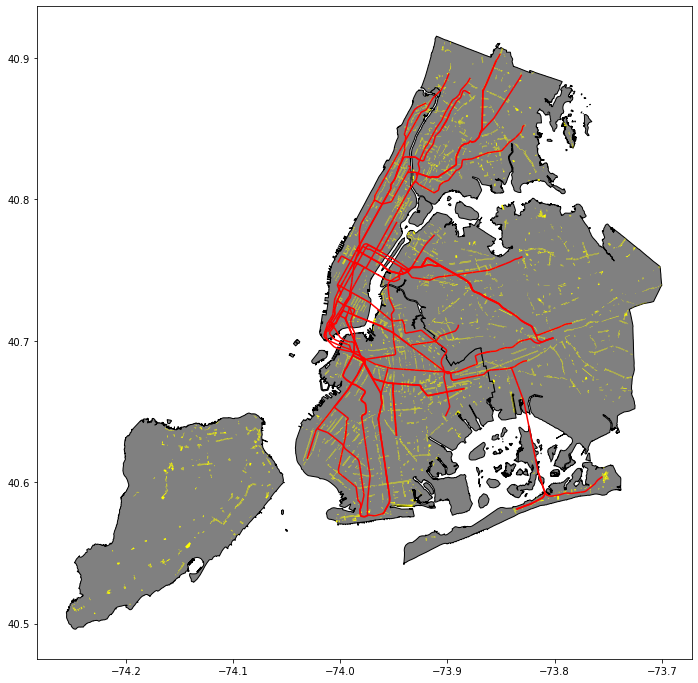

In [17]:
boundary = gpd.read_file(r'C:\Users\Nicole\Downloads\Borough Boundaries\geo_export_402abf60-ff4f-4bd7-a85b-460323a12e85.shp')

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(12, 12))
base = boundary.plot(ax=ax, color='grey', edgecolor='black')
subwaylines.plot(ax=ax, marker='o', color = 'red',markersize=30, legend=True);
zoning5.plot(ax=ax, marker='o', color = 'yellow',markersize=30, legend=True);

In [13]:
neighbourhoods = gpd.read_file(r'C:\Users\Nicole\Downloads\neighbourhoods.geojson')


C:\Users\Nicole\anaconda3\lib\site-packages\mapclassify\classifiers.py:235: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
C:\Users\Nicole\anaconda3\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: setting k to 8
  Warn("Warning: setting k to %d" % k_q, UserWarning)


Text(0.5, 1.0, 'commerical areas in different districts')

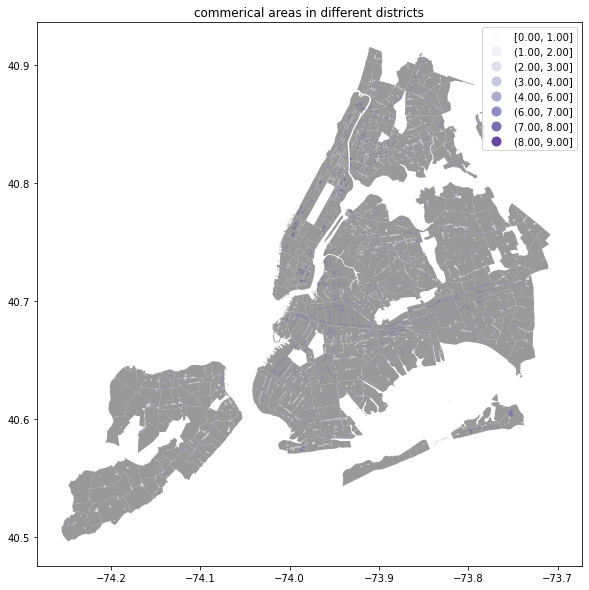

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='grey')
#base = boundary.plot(ax=ax, color='yellow', edgecolor='black')
zoning5.plot(column='overlay', ax=ax, legend=True, cmap='Purples',scheme='quantiles', k=10)#scheme='quantiles', 
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
plt.title('commerical areas in different districts')

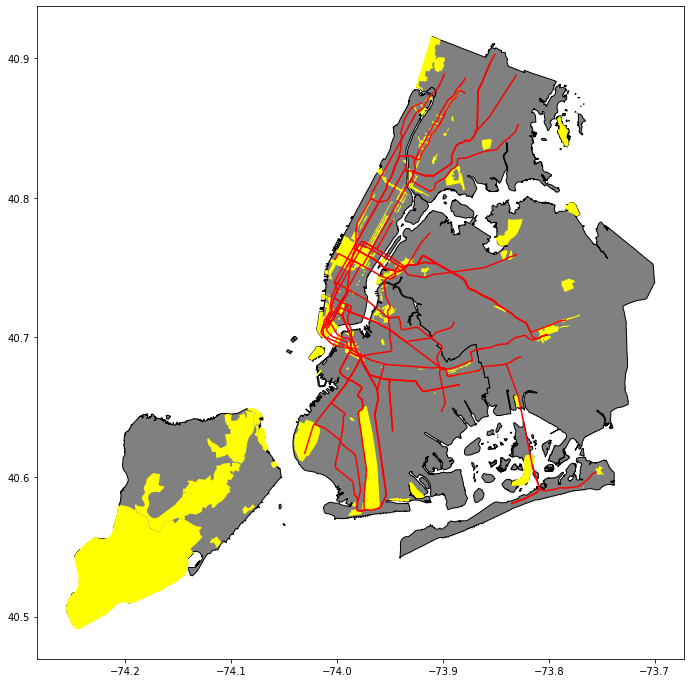

In [20]:
boundary = gpd.read_file(r'C:\Users\Nicole\Downloads\Borough Boundaries\geo_export_402abf60-ff4f-4bd7-a85b-460323a12e85.shp')

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(12, 12))
base = boundary.plot(ax=ax, color='grey', edgecolor='black')
subwaylines.plot(ax=ax, marker='o', color = 'red',markersize=30, legend=True);
zoning3.plot(ax=ax, marker='o', color = 'yellow',markersize=30, legend=True);

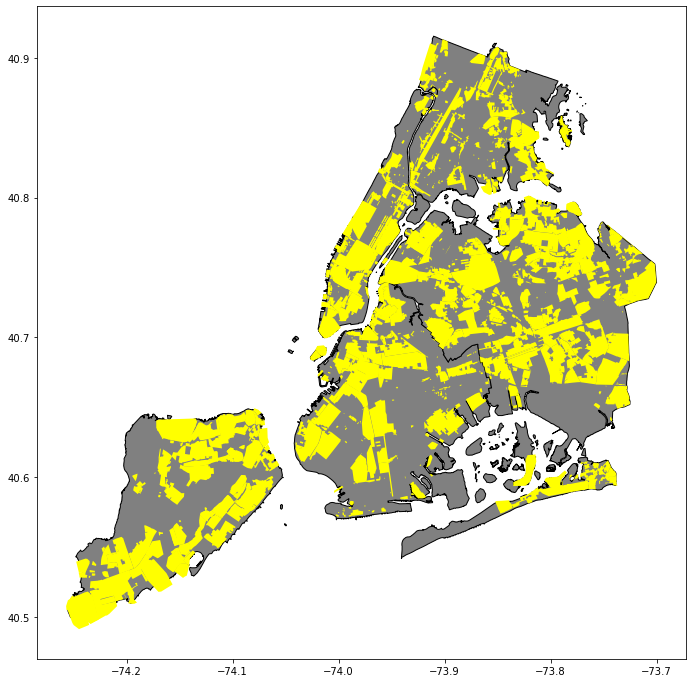

In [21]:
boundary = gpd.read_file(r'C:\Users\Nicole\Downloads\Borough Boundaries\geo_export_402abf60-ff4f-4bd7-a85b-460323a12e85.shp')

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(12, 12))
base = boundary.plot(ax=ax, color='grey', edgecolor='black')
zoning2.plot(ax=ax, marker='o', color = 'yellow',markersize=30, legend=True);



Text(0.5, 1.0, 'special purpose districts areas in neighbourhoods')

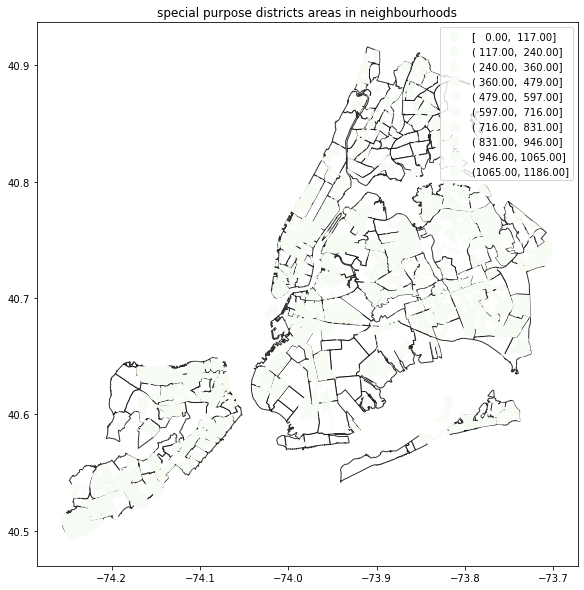

In [46]:
fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='white',edgecolor='black')
#base = boundary.plot(ax=ax, color='yellow', edgecolor='black')
zoning2.plot(column='project_na', ax=ax, legend=True, cmap='Greens',scheme='quantiles', k=10)#scheme='quantiles', 
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
plt.title('special purpose districts areas in neighbourhoods')

Text(0.5, 1.0, 'special purpose districts subdistricts in neighbourhoods')

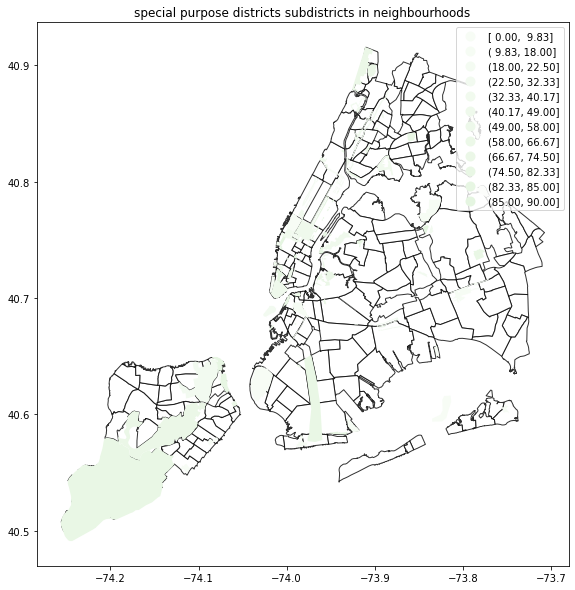

In [55]:
fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='white',edgecolor='black')
#base = boundary.plot(ax=ax, color='yellow', edgecolor='black')
zoning3.plot(column='sdname', ax=ax, legend=True, cmap='Greens',scheme='quantiles', k=12)#scheme='quantiles', 
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
plt.title('special purpose districts subdistricts in neighbourhoods')

C:\Users\Nicole\anaconda3\lib\site-packages\mapclassify\classifiers.py:235: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
C:\Users\Nicole\anaconda3\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: setting k to 10
  Warn("Warning: setting k to %d" % k_q, UserWarning)


Text(0.5, 1.0, 'zoning in neighbourhoods')

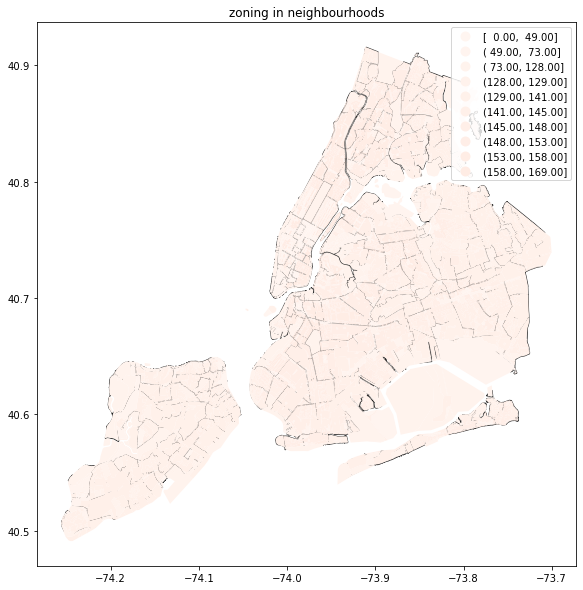

In [53]:
fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='white',edgecolor='black')
#base = boundary.plot(ax=ax, color='yellow', edgecolor='black')
zoning.plot(column='zonedist', ax=ax, legend=True, cmap='Reds',scheme='quantiles', k=12)#scheme='quantiles', 
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
plt.title('zoning in neighbourhoods')

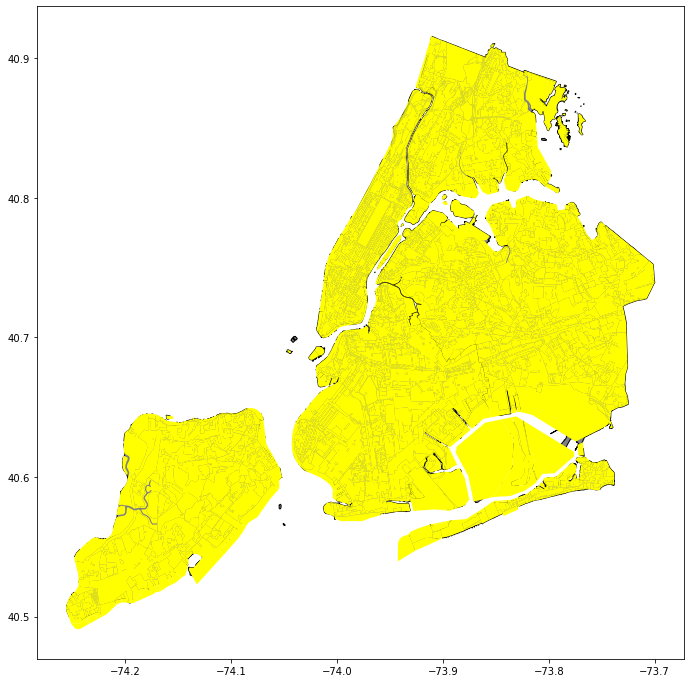

In [22]:
boundary = gpd.read_file(r'C:\Users\Nicole\Downloads\Borough Boundaries\geo_export_402abf60-ff4f-4bd7-a85b-460323a12e85.shp')

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(12, 12))
base = boundary.plot(ax=ax, color='grey', edgecolor='black')
zoning.plot(ax=ax, marker='o', color = 'yellow',markersize=30, legend=True);

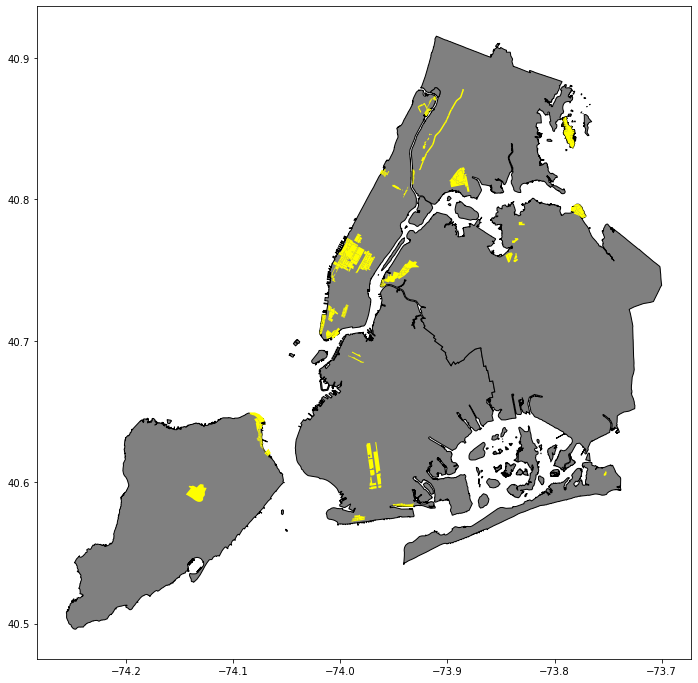

In [22]:
boundary = gpd.read_file(r'C:\Users\Nicole\Downloads\Borough Boundaries\geo_export_402abf60-ff4f-4bd7-a85b-460323a12e85.shp')

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(12, 12))
base = boundary.plot(ax=ax, color='grey', edgecolor='black')
zoning6.plot(ax=ax, marker='o', color = 'yellow',markersize=30, legend=True);

Text(0.5, 1.0, 'zoning map amendments in neighbourhoods')

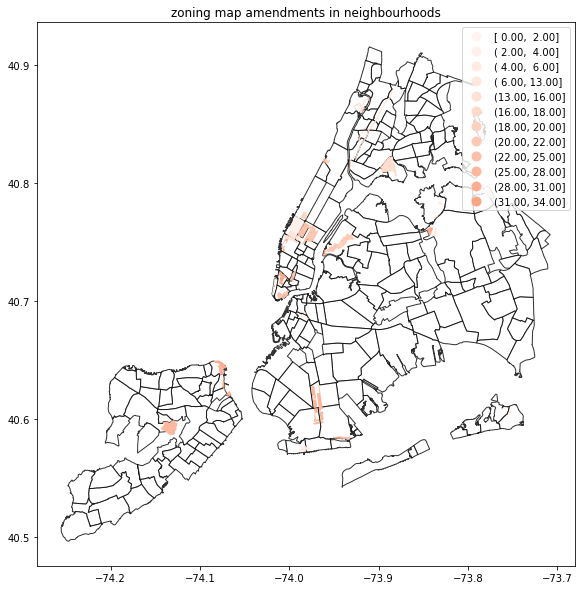

In [57]:
fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='white',edgecolor='black')
#base = boundary.plot(ax=ax, color='yellow', edgecolor='black')
zoning6.plot(column='spname', ax=ax, legend=True, cmap='Reds',scheme='quantiles', k=12)#scheme='quantiles', 
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
plt.title('zoning map amendments in neighbourhoods')

In [19]:

residential = gpd.read_file(r'C:\Users\Nicole\Downloads\Primary Residential Zoning by lot\geo_export_362ddc27-bc12-47d4-87a7-a9403b70a6ee.shp')
residential 

,id,zone,geometry
0,848374.0,R,"MULTIPOLYGON (((-74.04073 40.62367, -74.04070 ..."
1,848375.0,R,"MULTIPOLYGON (((-74.04746 40.68982, -74.04743 ..."
2,848376.0,R,"MULTIPOLYGON (((-73.93362 40.83266, -73.93361 ..."
3,848377.0,R,"MULTIPOLYGON (((-73.95170 40.74287, -73.95165 ..."
4,848378.0,R,"MULTIPOLYGON (((-74.25576 40.50773, -74.25575 ..."


Text(0.5, 1.0, 'residential areas in neighbourhoods')

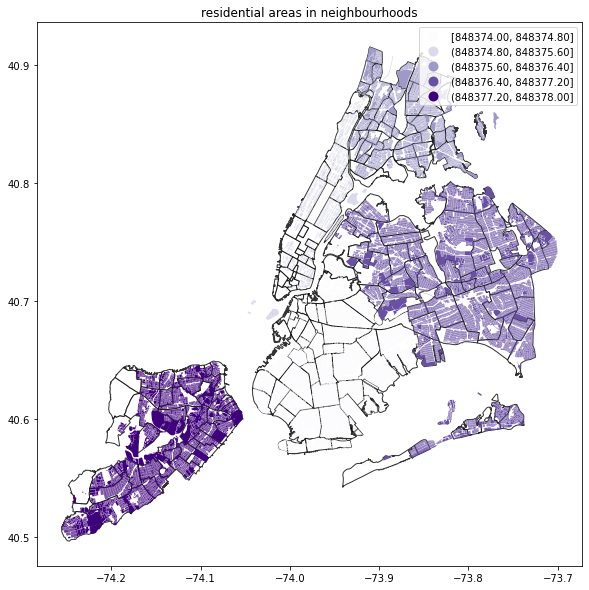

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='white',edgecolor='black')
#base = boundary.plot(ax=ax, color='yellow', edgecolor='black')
residential.plot(column='id', ax=ax, legend=True, cmap='Purples',scheme='quantiles', k=5)#scheme='quantiles', 
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
plt.title('residential areas in neighbourhoods')